Pidor Radar


In [11]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [12]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [15]:
man_types = 'portrait straight','portrait gay'
path = Path('mens')

In [16]:
if not path.exists():
    path.mkdir()
    for o in man_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} men')
        download_images(dest, urls=results)


In [23]:
fns = get_image_files(path)
fns

(#382) [Path('mens/portrait straight/ed37e1ab-c8d4-4c68-9ae9-5b82c7fdef20.jpg'),Path('mens/portrait straight/65471221-0305-46da-bba5-c88147e38e1a.jpg'),Path('mens/portrait straight/b8d9bfb0-ea79-478e-a4a5-2b282914468e.jpg'),Path('mens/portrait straight/134134dd-3626-443b-b8f6-cf503471c0f6.jpg'),Path('mens/portrait straight/9e46444e-328f-412d-a7dd-79fc88527c49.jpg'),Path('mens/portrait straight/837bf0be-5309-4a58-960a-51032117b581.jpg'),Path('mens/portrait straight/5d55d301-0a9d-4f8d-8850-64919cf7393f.jpg'),Path('mens/portrait straight/644f99c1-4867-4ea9-b66a-1baa8f209aa2.jpg'),Path('mens/portrait straight/976eac69-bd52-4016-8a7e-ee7d5f8c2d25.jpg'),Path('mens/portrait straight/ff5ccd42-47c8-46a8-8e08-12c156bb88d3.jpg')...]

In [24]:
failed = verify_images(fns)
failed

(#0) []

In [26]:
failed.map(Path.unlink);

In [28]:
men = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [29]:
dls = men.dataloaders(path)

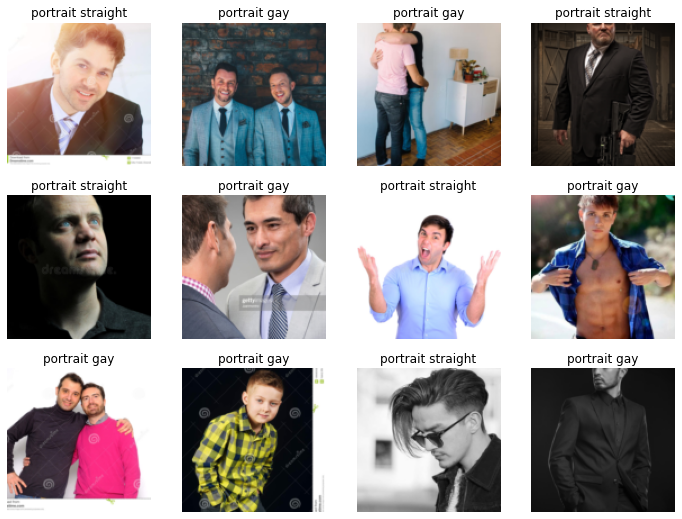

In [30]:
dls.valid.show_batch(max_n=12, nrows=3)

In [32]:
men = men.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = men.dataloaders(path)

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.325586,1.539513,0.434211,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.919070,0.836858,0.355263,00:06
1,0.857456,0.839938,0.315789,00:06
2,0.786669,0.933105,0.289474,00:06
3,0.701864,0.918190,0.289474,00:06
4,0.614583,0.924837,0.276316,00:07
5,0.591758,0.910293,0.250000,00:07
6,0.550417,0.939472,0.276316,00:07
7,0.502245,0.969890,0.263158,00:06
8,0.455990,0.975090,0.263158,00:06
9,0.420463,0.964447,0.263158,00:07


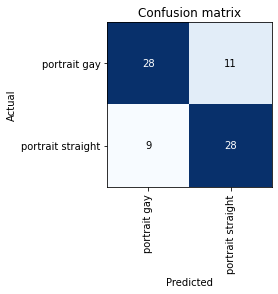

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

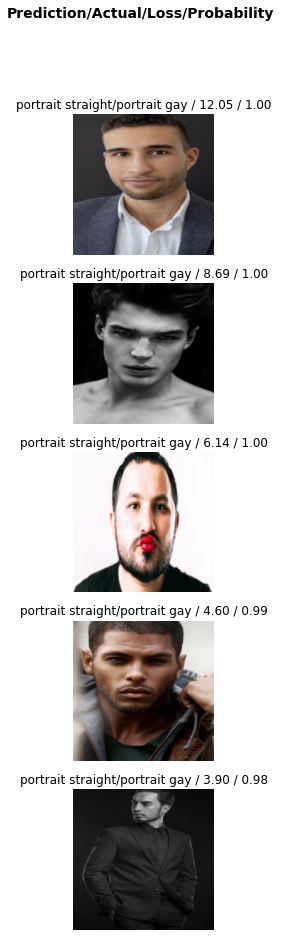

In [39]:
interp.plot_top_losses(5, nrows=5)

In [40]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [64]:
learn.export()

In [65]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [66]:
learn_inf = load_learner(path/'export.pkl')

In [67]:
learn_inf.predict('mens/portrait gay/man_gay.jpg')

('portrait gay', TensorBase(0), TensorBase([0.9865, 0.0135]))

In [68]:
learn_inf.dls.vocab

['portrait gay', 'portrait straight']

In [69]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [70]:
btn_upload = SimpleNamespace(data = ['mens/portrait gay/man_gay.jpg'])
img = PILImage.create(btn_upload.data[-1])

In [71]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [72]:
pred,pred_idx,probs = learn_inf.predict(img)

In [87]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: portrait gay; Probability: 0.9865')

In [88]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [89]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [90]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [91]:
#hide_output
VBox([widgets.Label('Select your photo!'), 
      btn_upload, btn_run, out_pl, lbl_pred])